## Classification
- binary classification is a key classification concept that is used in deep learning 
- for example classifying between spam and non spam 
- Multiclass classification on the other hand isthe classification of more than one thing or another 
- multi label classification refers to classiication of certain things with certain tags so one item could have multiplie tags 

In [27]:
# Image classificaton problems use differnet model specifications than numerical classification problems 
# lets import some data and classes that we need 
import tensorflow as tf
import sklearn 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [4]:

from sklearn.datasets import make_circles 

#setting a variable that is going to be the number of circles
n_samples = 1000

#making circles  
X, y = make_circles(n_samples, 
                   noise = 0.03,
                   random_state= 42)


In [5]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [6]:
# our data is a little hard to understand at the moment becasue we have X which is a number that is less than 1, so we need to visualise it  
# we are going to use oandas t o visualise this 
circles = pd.DataFrame({"X0": X[:,0], "X1":X[:,1], "label":y})
circles 

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


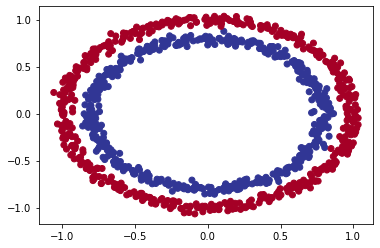

In [7]:
# not lets visualise using a plot 
plt.scatter(X[:,0], X[:,1], c = y, cmap= plt.cm.RdYlBu)

In [8]:
# lets familirise ourselves with the data 
X.shape, y.shape
# so we are able to see that X has 1000 samples but has a shape of 2 but y has the same number of samples but has a shape of 1 because it has done output 



((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [11]:
# how many samples are we working with:
len(X), len(y)

(1000, 1000)

In [12]:
X[0], y[0]
# we are trying to take the point in X and then generate an output of either 1 or 0 


(array([0.75424625, 0.23148074]), 1)

In [13]:
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model_1= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # we need a specific loss function # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"]) # accuracy metric, a probability output that shows the proportion that the model gets right 
# now we want to fit the model 
with tf.device('/cpu:0'): model_1.fit(X,y, epochs=200) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/200


2022-07-08 23:14:56.241639: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-08 23:14:56.241861: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-08 23:14:56.302608: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 2ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/200
 1/32 [..............................] - ETA: 0s - loss: 0.8161 - accuracy: 0.3438

2022-07-08 23:14:56.587681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4950
Epoch 12/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4980
Epoch 13/200
32/32 

In [14]:
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model_2= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), # we need a specific loss function # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"]) # accuracy metric, a probability output that shows the proportion that the model gets right 
# now we want to fit the model 
with tf.device('/cpu:0'): model_2.fit(X,y, epochs=200) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/200
 1/32 [..............................] - ETA: 0s - loss: 0.8161 - accuracy: 0.3438

2022-07-08 23:15:10.872595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4950
Epoch 12/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4980
Epoch 13/200
32/32 

In [15]:
model_2.evaluate(X,y)

19/32 [================>.............] - ETA: 0s - loss: 0.6920 - accuracy: 0.5263

2022-07-08 23:15:25.512756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935999393463135, 0.5]

In [16]:
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model_3= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.Sequential([])
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
    
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), # mae means mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
# now we want to fit the model 
with tf.device('/cpu:0'): model_3.fit(X,y, epochs=100, verbose = 1) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
 1/32 [..............................] - ETA: 0s - loss: 0.6543 - accuracy: 0.7500

2022-07-08 23:15:26.092190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5030
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4450
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4890
Epoch 13/100
32/32 

In [17]:
model_3.evaluate(X,y)

19/32 [================>.............] - ETA: 0s - loss: 0.6998 - accuracy: 0.4967

2022-07-08 23:15:34.145384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 7ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980251669883728, 0.5080000162124634]

In [18]:
# not lets plot the decision boundries using the preduction data 
# lets create a helping function for this 
# called plot_decision_boundries 
# lets use a meshgrid to carry this out 
import numpy as np 

def plot_decision_boundary(model,X,y):
  # defining the axis boundaries of the plot and creating a meshgrid :
  # x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+ 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+ 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                      np.linspace(y_min,y_max,100))


  x_in = np.c_[xx.ravel(),yy.ravel()] # stacks t2d arrays together

  # making prediction suing x_in
  y_pred = model.predict(x_in)

  # check for multiclass 
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-clas
      print("doing multiclass classification")
      # we have to reshape our predctions to get the ready for plotting 
      y_pred = np.argmax(y_pred,axis = 1).reshape(xx.shape)
  else:
      print("doing binary classification")
      y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the deciison bountary 
  plt.contourf(xx,yy,y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [19]:

x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+ 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+ 0.1
x_min, x_max, y_min, y_max


(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

 61/313 [====>.........................] - ETA: 0s

2022-07-08 23:15:34.604103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
doing binary classification


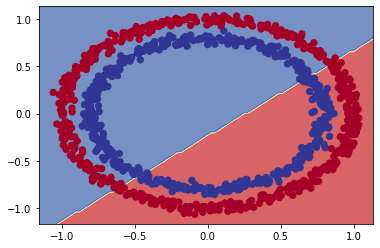

In [20]:
plot_decision_boundary(model_3, 
                       X=X,
                       y =y
                       )

The main problem is that the data is circular, in a regression problem the seperation of data is generally linear but in this problem it is circular so thus we need to make the model function  in a circualr manner 
1. CS231n - https://cs231n.github.io/neural-networks-case-study/
2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

In [21]:
# now lets see if the function for plotting the model can be used for a regression problem 
tf.random.set_seed(42)

# created some regression data 
X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100,1100,5) # y = x+ 10 is the relation between the 2 sets 

In [22]:
# elts visualise the data 
X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [23]:
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# lets fit out model 
model_3.fit(X_reg_train,y_reg_train, epochs = 100)

Epoch 1/100


ValueError: in user code:

    File "/Users/janadhi/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/janadhi/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/janadhi/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/janadhi/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/Users/janadhi/miniforge3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/janadhi/miniforge3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_2" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


We compiled the model for binary classification 
but we are working on a regression problemm so we need to change the model 


In [ ]:
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model4= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model4.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])
# now we want to fit the model 
with tf.device('/cpu:0'): model4.fit(tf.expand_dims(X_reg_train,axis = -1),y_reg_train, epochs=100) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
1/5 [=====>........................] - ETA: 0s - loss: 48.9735 - mae: 48.9735

2022-07-08 16:51:42.851791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 42.4797 - mae: 42.4797
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 41.5537 - mae: 41.5537
Epoch 13/100
5/5 [==============================] - 0s 4ms/step - loss: 42.0972 - mae: 42.0972
Epoch 14/100
5/5 [==============================] - 0s 4ms/step - loss: 41.8647 - mae: 41.8647
Epoch 15/100
5/5 [==============================] - 0s 3ms/step - loss: 41.5342 - mae: 41.5342
Epoch 16/100
5/5 [==============================] - 0s 3ms/step - loss: 41.4028 - mae: 41.4028
Epoch 17/100
5/5 [==============================] - 0s 3ms/step - loss: 41.6887 - mae: 41.6887
Epoch 18/100
5/5 [==============================] - 0s 3ms/step 

In [ ]:
# lets make a prediction:
y_reg_preds = model4.predict(X_reg_test)

2022-07-08 16:57:37.975108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 31ms/step


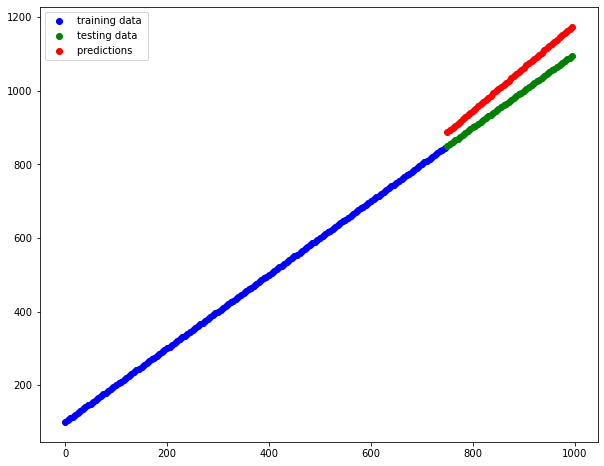

In [ ]:
# lets plot this data:
plt.figure(figsize = (10,8))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "training data ")
plt.scatter(X_reg_test, y_reg_test, c= "g", label = "testing data " )
plt.scatter(X_reg_test, y_reg_preds, c = "r", label = "predictions ")
plt.legend()

### ReLu activation function
- this a linear activation function that is very usefule in ML
- it is short for rectified linear activation function
- linear function that will output the input directly if it is positive, otherwise, it will output zero.
- often achieves better performance.
- The rectified linear activation function overcomes the vanishing gradient problem
- It is the default activation when developing multilayer Perceptron and convolutional neural networks.


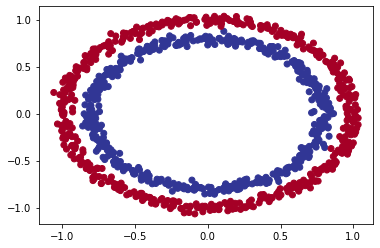

In [ ]:
# lets try and code a neural net that can distingusih our data from the circles 
# not lets visualise using a plot 
plt.scatter(X[:,0], X[:,1], c = y, cmap= plt.cm.RdYlBu)

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"), 
    tf.keras.layers.Dense(1)
   
])
model_4.compile(loss = "binary_crossentropy", # dependent on the problem type 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

with tf.device('/cpu:0'): history = model_4.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


2022-07-08 18:28:31.644177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 1

 52/313 [===>..........................] - ETA: 0s

2022-07-08 18:29:02.593272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
doing binary classification


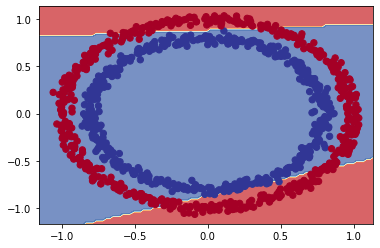

In [ ]:
plot_decision_boundary(model_4, X, y )

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"), 
    tf.keras.layers.Dense(1, activation = "sigmoid")
   
])
model_5.compile(loss = "binary_crossentropy", # dependent on the problem type 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"]) # the higher the number the better 

with tf.device('/cpu:0'): history = model_5.fit(X, y, epochs=100)

Epoch 1/100


/Users/janadhi/miniforge3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
22/32 [===================>..........] - ETA: 0s - loss: 0.6882 - accuracy: 0.5028

2022-07-08 18:28:53.996833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5500
Epoch 12/100
32/32 [

 39/313 [==>...........................] - ETA: 1s

2022-07-08 18:29:06.545851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
doing binary classification


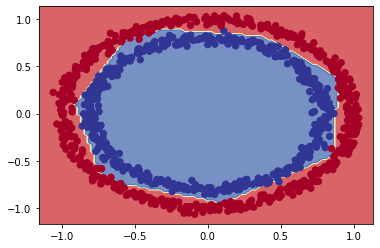

In [ ]:
# plotting new boundary 
plot_decision_boundary(model_5, X, y )

In [ ]:
#Lets create a toy tensor (similar to the data we pass into our models )
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

### Non-Linearity :
- ReLU
- leaky ReLU 
- sigmoid 
- ELU
- softmax 
- Tanh 

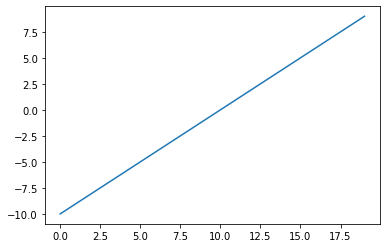

In [ ]:
plt.plot(A)

In [ ]:
#lets first try and define a sigmoid function 
def sigmoid(x):
    return 1/(1+tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.53978682e-05, 1.23394624e-04, 3.35350167e-04, 9.11051058e-04,
       2.47262395e-03, 6.69285096e-03, 1.79862101e-02, 4.74258773e-02,
       1.19202934e-01, 2.68941432e-01, 5.00000000e-01, 7.31058598e-01,
       8.80797148e-01, 9.52574134e-01, 9.82013762e-01, 9.93307173e-01,
       9.97527421e-01, 9.99089003e-01, 9.99664664e-01, 9.99876618e-01],
      dtype=float32)>

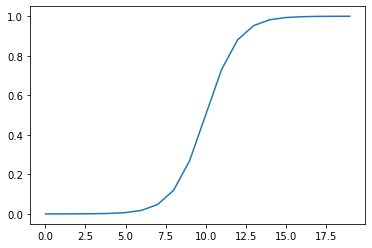

In [ ]:
# same function but in tf
plt.plot(tf.keras.activations.sigmoid(A))


In [ ]:
# lets try and define a relu function :
def relu(x):
    return tf.maximum(0,x)

relu(A)
#tunred the negative numbers to 0

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

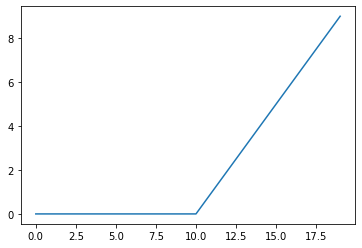

In [ ]:
plt.plot(relu(A))

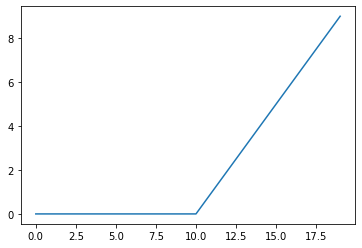

In [ ]:
plt.plot(tf.keras.activations.relu(A))

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>,
 [<matplotlib.lines.Line2D at 0x29a6abcd0>])

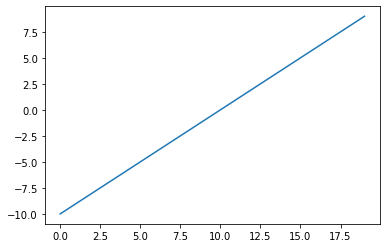

In [ ]:
tf.keras.activations.linear(A),plt.plot(tf.keras.activations.linear(A))
# returns the input unmodified 

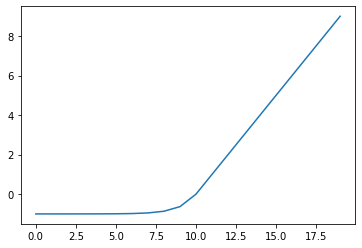

In [ ]:
plt.plot(tf.keras.activations.elu(A))

In [ ]:
def LeakyRelu(x):
    return tf.maximum((0.1*x),x)

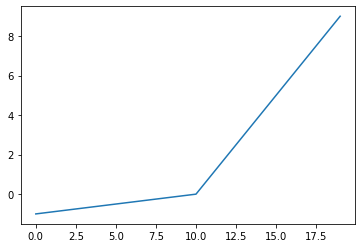

In [ ]:

plt.plot(LeakyRelu(A))

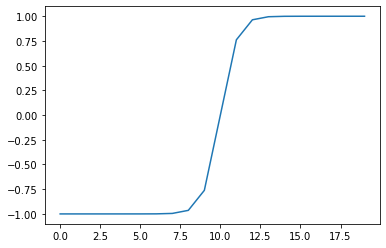

In [ ]:
plt.plot(tf.keras.activations.tanh(A))

In [ ]:
tf.keras.activations.softmax(A, axis =-1)
# wont work becase we have a scalar that is one dimensional

ValueError: Cannot apply softmax to a tensor that is 1D. Received input: [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]

In [ ]:
A.shape,A.ndim
# we only have one dimension in A

(TensorShape([20]), 1)

In [ ]:
len(X), X, y

(1000,
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1,

In [30]:
#lets split the data into a training and testing data sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [36]:
# lets recreate a model using just the training data to train on
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"), 
    tf.keras.layers.Dense(1, activation = "sigmoid")
   
])
model_6.compile(loss = "binary_crossentropy", # dependent on the problem type and tellsthe model how wrong the predictions are 
                optimizer = tf.keras.optimizers.Adam(lr = 0.01), # if we increase the relanign rate we will be able to find the patterns faster 
                metrics = ["accuracy"]) # the higher the number the better 

with tf.device('/cpu:0'): history_6 = model_6.fit(X_train, y_train, epochs=25)  # lets reduce the number of epochs

Epoch 1/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
 1/25 [>.............................] - ETA: 0s - loss: 0.6801 - accuracy: 0.5000

2022-07-08 23:24:19.711966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7650
Epoch 12/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7837
Epoch 13/25
25/25 [=========

In [ ]:
model_6.evaluate(X_test,y_test)
# look at how good the accuracy is 

7/7 [==============================] - 0s 13ms/step - loss: 0.1247 - accuracy: 1.0000


2022-07-08 19:58:59.925956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.12468845397233963, 1.0]

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


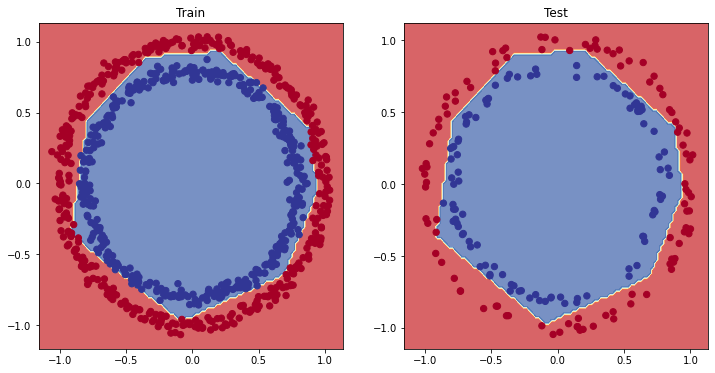

In [ ]:
# now lets plot the decisison boundaries for the training and test sets 
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_6, X= X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6, X = X_test, y = y_test)
plt.show()
# visualising both the training data set and the test data sets 

In [ ]:
# lets see a summary 
model_6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (32, 4)                   12        
                                                                 
 dense_35 (Dense)            (32, 4)                   20        
                                                                 
 dense_36 (Dense)            (32, 1)                   5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# how can we plot the loss (loss curves)?
# we are able to plot the learning 
# first we must visualise the history of the preductions as a data frame with pandas 
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


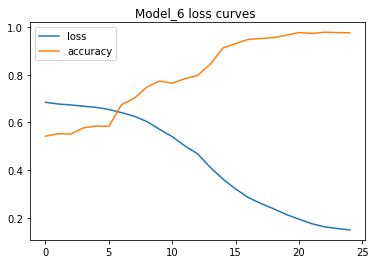

In [ ]:
#now we can plot this:
pd.DataFrame(history.history).plot()
plt.title("Model_6 loss curves ");
#we can see that the loss is decreasing (how wrong the model is )
# the predctions are getting coloser to 1 which measn its getting close to the ground truth

## Finding the Ideal Leanring Rate:
- learning rate call back 
- this is an extralevel of functionality that you can add while your models is training
- modified loss curve plot 

In [51]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
with tf.device('/cpu:0'): history_7 = model_7.fit(X_train, y_train, epochs=100,callbacks=[lr_scheduler]) # lets reduce the number of epochs                      y_train, 
                      

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
 1/25 [>.............................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5625

2022-07-08 23:31:58.439117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5013 - lr: 2.5119e-04
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5050 - lr: 2.8184e-04
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6863 - 

Epoch 100/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8582 - accuracy: 0.4613 - lr: 8.9125

<AxesSubplot:xlabel='epochs'>

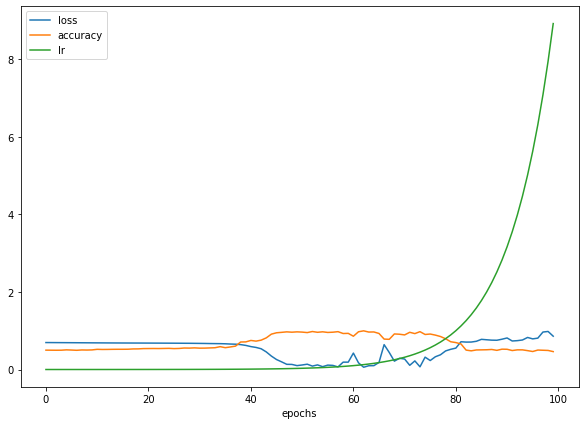

In [ ]:
pd.DataFrame(history_7.history).plot(figsize = (10,7), xlabel = "epochs")
# now we want to plot the learning rate versus the loss 

In [ ]:
# plotting the learning rate vs the loss 
lrs = 1e-4 * (10** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)
#the number of elements in the array


100

Text(0.5, 1.0, 'learning Rate vs Loss ')

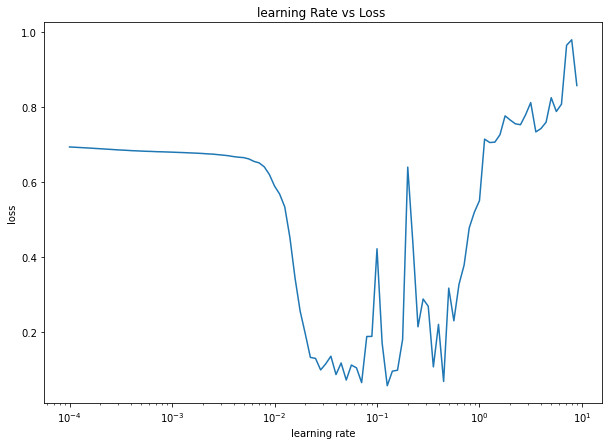

In [ ]:
# lets create a plot 
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_7.history["loss"]) # here we are trying to plot with long on the x axis 
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning Rate vs Loss ")
# now we can identify where the ideal learning rate will be 
# we wanta  reagion that is not flat but decreases a lto 
#genenrally we want to us a learning rate of about 0.01


In [41]:
# lets try to use a higher ideal learning rate of 0.02
# lets recreate a model using just the training data to train on
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"), 
    tf.keras.layers.Dense(1, activation = "sigmoid")
   
])
model_8.compile(loss = "binary_crossentropy", # dependent on the problem type and tellsthe model how wrong the predictions are 
                optimizer =  tf.keras.optimizers.Adam(lr=0.02), # if we increase the relanign rate we will be able to find the patterns faster 
                metrics = ["accuracy"]) # the higher the number the better 


#fit the model
with tf.device('/cpu:0'): history_8 = model_8.fit(X_train, y_train, epochs=20)  # lets reduce the number of epochs


Epoch 1/20


/Users/janadhi/miniforge3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
 1/25 [>.............................] - ETA: 0s - loss: 0.6616 - accuracy: 0.5625

2022-07-08 23:27:41.311356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9500
Epoch 12/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.9750
Epoch 13/20
25/25 [=========

In [ ]:
# evaluating model_8 on the test data 
model_8.evaluate(X_test,y_test)
model_6.evaluate(X_test,y_test) # this model has a higher preformance 

7/7 [==============================] - 0s 10ms/step - loss: 0.0574 - accuracy: 0.9900


2022-07-08 23:10:37.698161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 11ms/step - loss: 0.1247 - accuracy: 1.0000


2022-07-08 23:10:37.974707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.12468845397233963, 1.0]

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

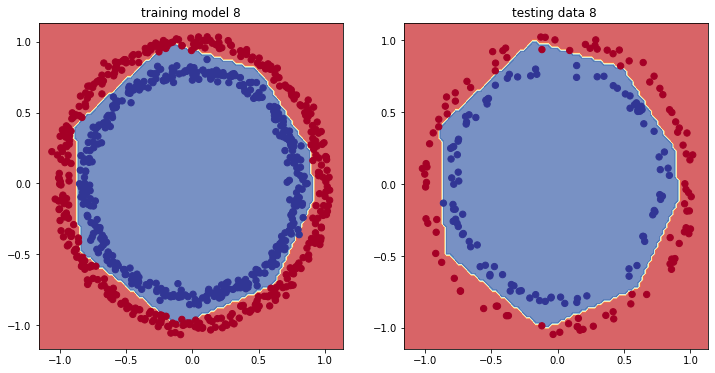

In [50]:
# now lets visualise the models and plot the decision boundaries
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("training model 8")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("testing model 8 ")
plot_decision_boundary(model_8, X_test, y_test)
plt.show

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

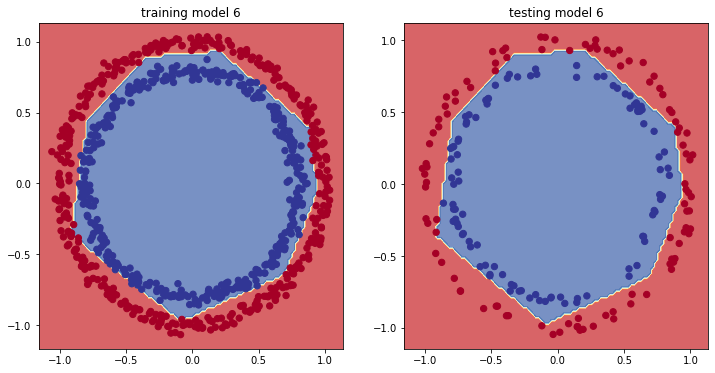

In [55]:
# now lets visualise the models and plot the decision boundaries of model 6
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("training model 6")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1,2,2)
plt.title("testing model 6")
plot_decision_boundary(model_6, X_test, y_test)
plt.show

# Classification methods
 
- Accuracy: can be measured through the use of tf.keras.metrics.Accuracy() or sklearn.metrics.accuracy_score()
- Precision: accuracy is not the best for imbalanced classes in which case we would want to use precision which leads to less false positives 
- Recall: leads to less false negatives, Precision recall trade off, there is a tradeoff curve 
- F1: - score is a good combination of preciison and recall and a good overall metric for a classification model 
- Confusion matrix: when comparing predictions to truuth labels to see where the ofmodel gets confused. can be hard to use with large numbers of classes 



- Classification report(from sklearn) 



In [58]:
#Checking the accuracy of our model:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100): .2f}%")

7/7 [==============================] - 1s 12ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740179494023323
Model accuracy on the test set:  99.00%


2022-07-09 00:02:29.691660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


# Confusion matrix 

In [61]:
from sklearn.metrics import confusion_matrix
# make predictions 
y_preds = tf.round(model_8.predict(X_test))

# creating the matrix :
confusion_matrix(y_test, y_preds) 
# our predictions have come out as predictions probability form that are continious becasue of e 
# we need to ensure that they are going to be in binary format 
# we need to use the tf.round() function



7/7 [==============================] - 0s 7ms/step


array([[99,  2],
       [ 0, 99]])

In [ ]:
# making a visual of the confusion matrix 
# this is going to utelise the sklearn plot_confusion matrix

import itertools 

figsize = (10,10)

# creating teh confusion matrix 
cm = confusion_matrix(y_true, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1) [:, np.newaxis]
n_classes = cm.shape[0]

#Lets make it look good
fig, ax = plt.subplots(figsize=figsize)
# creating a matric plot 
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)


classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)


threshold = (cm.max()+ c.min())/2.

In [ ]:

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)